#  Dataset
This Dataset consists CO2 emissions in metricton per capita of every country around the world. The datas are from 1990 to 2019. Coutries regions are included. Data is collected from world data bank.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
print(plt.style.available)
# plt.style.use('dark_background')

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn', 'seaborn-bright', 'seaborn-colorblind', 'seaborn-dark', 'seaborn-dark-palette', 'seaborn-darkgrid', 'seaborn-deep', 'seaborn-muted', 'seaborn-notebook', 'seaborn-paper', 'seaborn-pastel', 'seaborn-poster', 'seaborn-talk', 'seaborn-ticks', 'seaborn-white', 'seaborn-whitegrid', 'tableau-colorblind10']


In [2]:
df = pd.read_csv('/kaggle/input/co2-emission-around-the-world/CO2_emission.csv')
df.head()


,Country Name,country_code,Region,Indicator Name,1990,1991,1992,1993,1994,1995,...,2011,2012,2013,2014,2015,2016,2017,2018,2019,2019.1
0,Aruba,ABW,Latin America & Caribbean,CO2 emissions (metric tons per capita),NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,South Asia,CO2 emissions (metric tons per capita),0.191745,0.167682,0.095958,0.084721,0.075546,0.068468,...,0.296506,0.259295,0.185624,0.146236,0.172897,0.149789,0.131695,0.163295,0.159824,0.159824
2,Angola,AGO,Sub-Saharan Africa,CO2 emissions (metric tons per capita),0.553662,0.544539,0.543557,0.708984,0.836804,0.912141,...,0.985522,0.950696,1.036294,1.099779,1.135044,1.031811,0.813301,0.777675,0.792137,0.792137
3,Albania,ALB,Europe & Central Asia,CO2 emissions (metric tons per capita),1.819542,1.242810,0.683700,0.638307,0.645355,0.605436,...,1.669423,1.503240,1.533630,1.668337,1.603775,1.557664,1.788786,1.782739,1.692248,1.692248
4,Andorra,AND,Europe & Central Asia,CO2 emissions (metric tons per capita),7.521832,7.235379,6.963079,6.724178,6.541579,6.733479,...,5.850886,5.944654,5.942800,5.807128,6.026182,6.080600,6.104134,6.362975,6.481217,6.481217


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 215 entries, 0 to 214
Data columns (total 35 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country Name    215 non-null    object 
 1   country_code    215 non-null    object 
 2   Region          215 non-null    object 
 3   Indicator Name  215 non-null    object 
 4   1990            185 non-null    float64
 5   1991            186 non-null    float64
 6   1992            189 non-null    float64
 7   1993            189 non-null    float64
 8   1994            189 non-null    float64
 9   1995            190 non-null    float64
 10  1996            190 non-null    float64
 11  1997            190 non-null    float64
 12  1998            189 non-null    float64
 13  1999            189 non-null    float64
 14  2000            190 non-null    float64
 15  2001            190 non-null    float64
 16  2002            191 non-null    float64
 17  2003            191 non-null    flo

In [4]:
# dropping redundant columns
df.drop(['country_code','Indicator Name','2019.1'],axis=1,inplace=True)

In [5]:
col_year = ['1990','1991','1992','1993','1994','1995','1996','1997','1998','1999','2000','2001','2002','2003',
            '2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016','2017',
            '2018','2019']
df1 = pd.melt(df,id_vars=['Country Name'],value_vars=col_year,var_name='Year',value_name='CO2 Value')
df1.head(5)

,Country Name,Year,CO2 Value
0,Aruba,1990,NaN
1,Afghanistan,1990,0.191745
2,Angola,1990,0.553662
3,Albania,1990,1.819542
4,Andorra,1990,7.521832


In [6]:
""" Tools to support clustering: correlation heatmap, normaliser and scale 
(cluster centres) back to original scale, check for mismatching entries """

def map_corr(df, size=6):
    """Function creates heatmap of correlation matrix for each pair of 
    columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot (in inch)
        
    The function does not have a plt.show() at the end so that the user 
    can savethe figure.
    """

    import matplotlib.pyplot as plt  # ensure pyplot imported

    corr = df.corr()
    plt.figure(figsize=(size, size))
    plt.matshow(corr, cmap='coolwarm', origin="lower")  # Change 'location' to 'origin'
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)

    plt.colorbar()
    # no plt.show() at the end

    
    
def scaler(df):
    """ Expects a dataframe and normalises all 
        columnsto the 0-1 range. It also returns 
        dataframes with minimum and maximum for
        transforming the cluster centres"""

    # Uses the pandas methods
    df_min = df.min()
    df_max = df.max()

    df = (df-df_min) / (df_max - df_min)

    return df, df_min, df_max


def backscale(arr, df_min, df_max):
    """ Expects an array of normalised cluster centres and scales
        it back. Returns numpy array.  """

    # convert to dataframe to enable pandas operations
    minima = df_min.to_numpy()
    maxima = df_max.to_numpy()

    # loop over the "columns" of the numpy array
    for i in range(len(minima)):
        arr[:, i] = arr[:, i] * (maxima[i] - minima[i]) + minima[i]

    return arr


def get_diff_entries(df1, df2, column):
    """ Compares the values of column in df1 and the column with the same 
    name in df2. A list of mismatching entries is returned. The list will be
    empty if all entries match. """

    import pandas as pd  # to be sure

    # merge dataframes keeping all rows
    df_out = pd.merge(df1, df2, on=column, how="outer")
    print("total entries", len(df_out))
    # merge keeping only rows in common
    df_in = pd.merge(df1, df2, on=column, how="inner")
    print("entries in common", len(df_in))
    df_in["exists"] = "Y"

    # merge again
    df_merge = pd.merge(df_out, df_in, on=column, how="outer")

    # extract columns without "Y" in exists
    df_diff = df_merge[(df_merge["exists"] != "Y")]
    diff_list = df_diff[column].to_list()

    return diff_list

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


<Figure size 600x600 with 0 Axes>

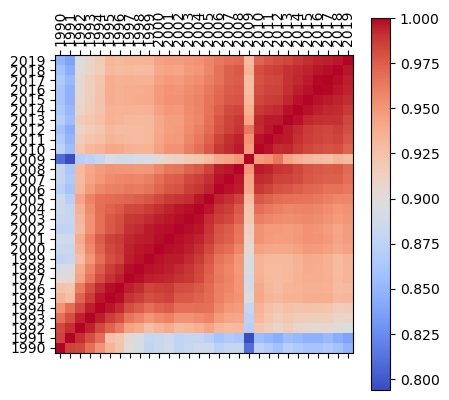

In [7]:
# Load your dataset (replace 'your_dataset.csv' with the actual path to your dataset)
from sklearn.cluster import KMeans

# Visualize the correlation matrix
map_corr(df)
df.fillna(df.mean(), inplace=True)

# Drop non-numeric columns if needed (assuming they are not relevant for clustering)
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Normalize the data using the scaler function
normalized_df, df_min, df_max = scaler(numeric_df)

# Choose the number of clusters (you may need to determine this based on your specific use case)
num_clusters = 3


# Apply KMeans clustering
kmeans = KMeans(n_clusters=num_clusters, random_state=42)
clusters = kmeans.fit_predict(normalized_df)

# Add cluster labels to the original DataFrame
df['Cluster'] = clusters


# CO2 Value by Year

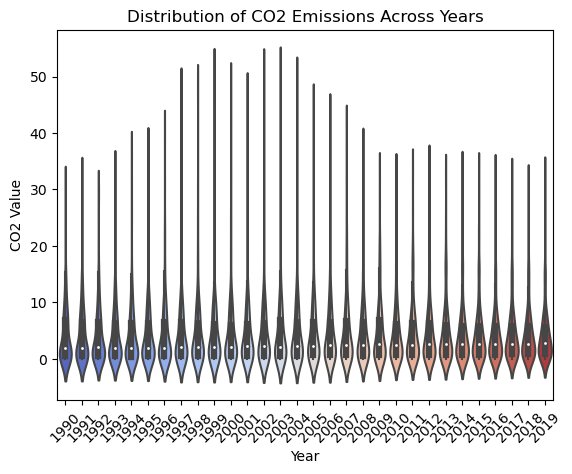

In [14]:
sns.violinplot(data=df1, x='Year', y='CO2 Value', palette='coolwarm')
plt.title('Distribution of CO2 Emissions Across Years')
plt.xlabel('Year')
plt.ylabel('CO2 Value')
plt.tick_params(axis='x', rotation=45) 

# CO2 Value by Country

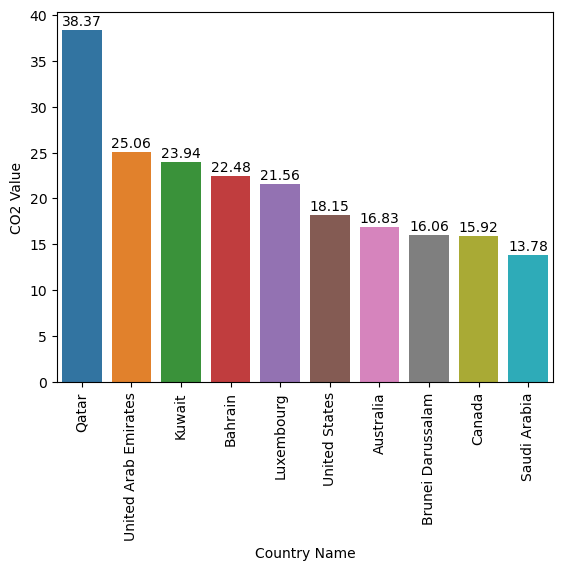

In [9]:
country = round(df1.groupby('Country Name')['CO2 Value'].mean().reset_index().sort_values('CO2 Value',ascending=False),2)
country = country.head(10).reset_index(drop=True)
g = sns.barplot(data=country,x='Country Name',y='CO2 Value')
for v in country.itertuples():
    #print(v)
    g.text(x=v.Index,y=v._2+0.5,s=str(v._2), size=10, ha="center")
plt.xticks(rotation=90)
plt.show()

# Pie chart for CO2 emissions for the top 5 countries

Text(0.5, 1.0, 'Proportion of CO2 Emissions for Top 5 Countries in 2019')

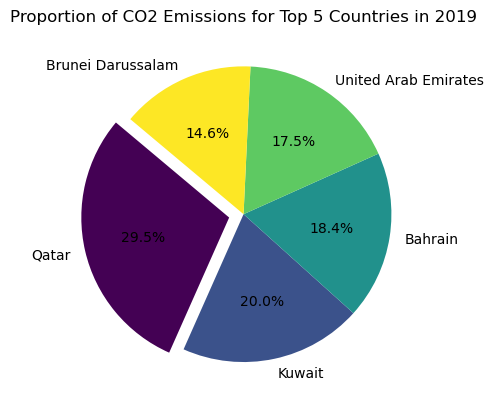

In [15]:
# Pie chart showing the proportion of CO2 emissions for the top 5 countries in 2019
top_countries_2019 = df1[df1['Year'] == '2019'].nlargest(5, 'CO2 Value')

explode = (0.1, 0, 0, 0, 0)
colors = plt.cm.viridis(np.linspace(0, 1, 5))
plt.pie(top_countries_2019['CO2 Value'], labels=top_countries_2019['Country Name'], autopct='%1.1f%%',
               startangle=140, explode=explode, colors=colors)
plt.title('Proportion of CO2 Emissions for Top 5 Countries in 2019')

# The country has the most CO2 value for each Year

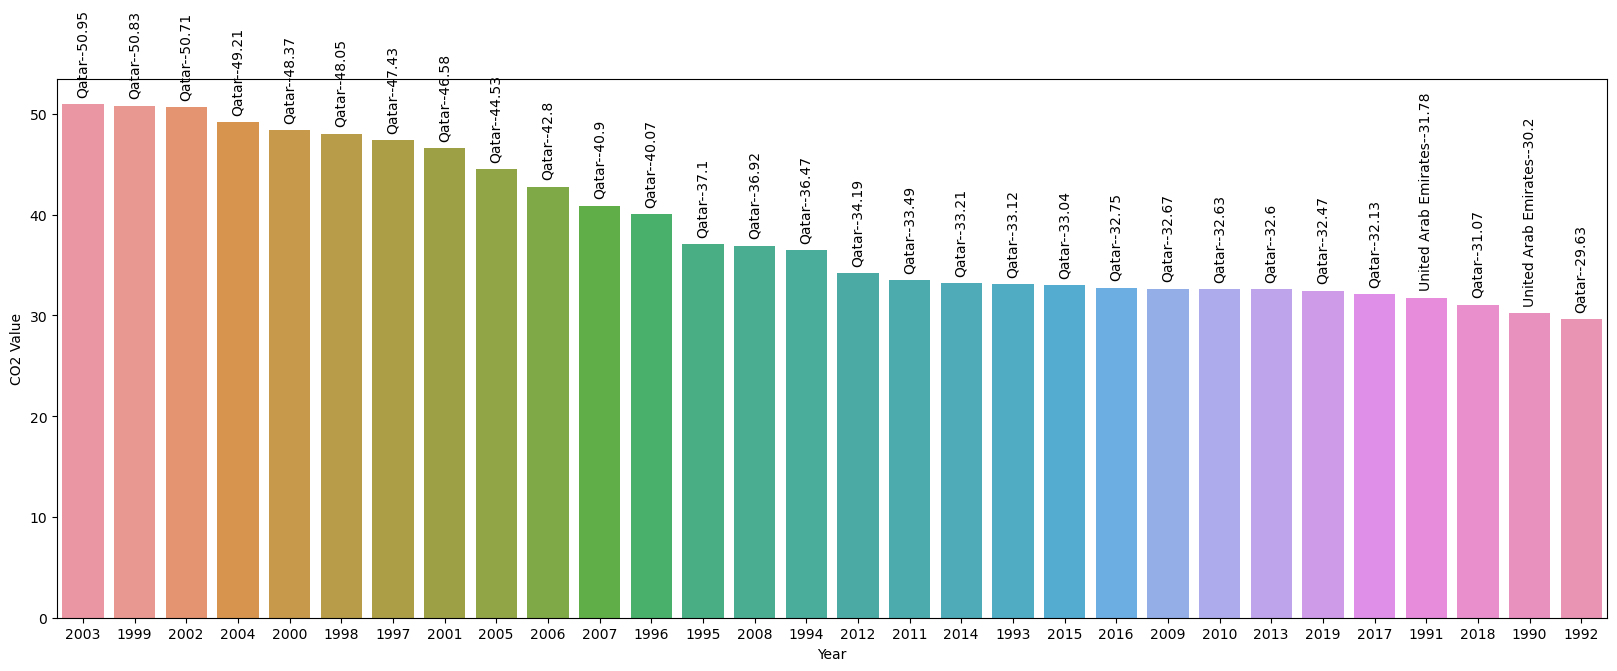

In [16]:
year_country_co2 = round(df1.groupby(['Year','Country Name'])['CO2 Value'].mean().reset_index().sort_values('CO2 Value',ascending=False).groupby('Year').head(1).reset_index(drop=True),2)
plt.figure(figsize=(20,7))
g = sns.barplot(data=year_country_co2,x='Year',y='CO2 Value')
country = year_country_co2['Country Name']
for v in year_country_co2.itertuples():
    #print(v)
    g.text(x=v.Index,y=v._3+1,s=str(v._2 + '--' +str(round(v._3, 2))), size=10, rotation=90, ha="center")   
plt.show()

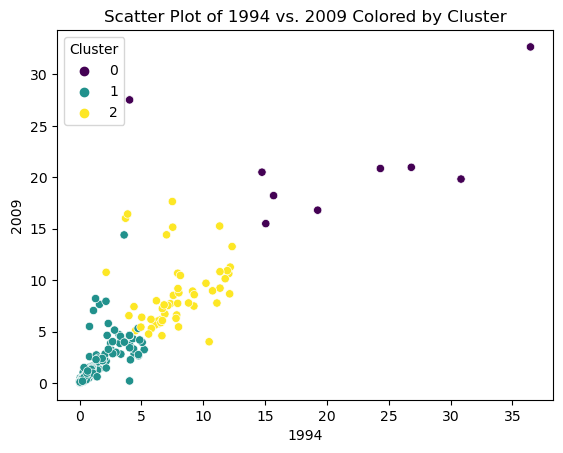

In [17]:
sns.scatterplot(x='1994', y='2009', hue='Cluster', data=df, palette='viridis')
plt.title('Scatter Plot of 1994 vs. 2009 Colored by Cluster')
plt.show()


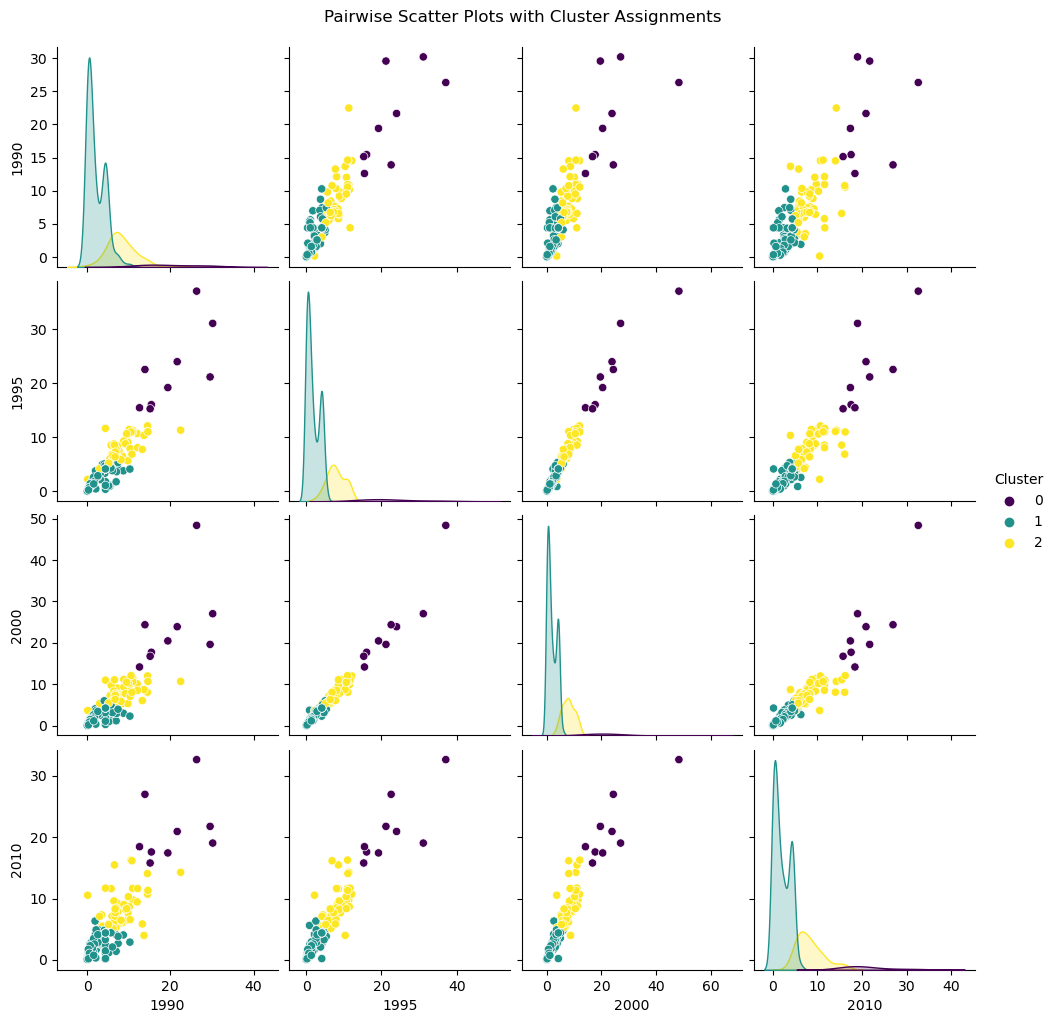

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

# Assuming 'df' is your DataFrame with clustering results


# Scatter plot for pairs of relevant features with cluster assignments
def pairwise_scatter(df, features, cluster_col='Cluster'):
    sns.pairplot(df, vars=features, hue=cluster_col, palette='viridis')
    plt.suptitle('Pairwise Scatter Plots with Cluster Assignments', y=1.02)
    plt.show()


# Apply the functions

pairwise_scatter(df, features=['1990', '1995', '2000', '2010'], cluster_col='Cluster')



## Fitting Model

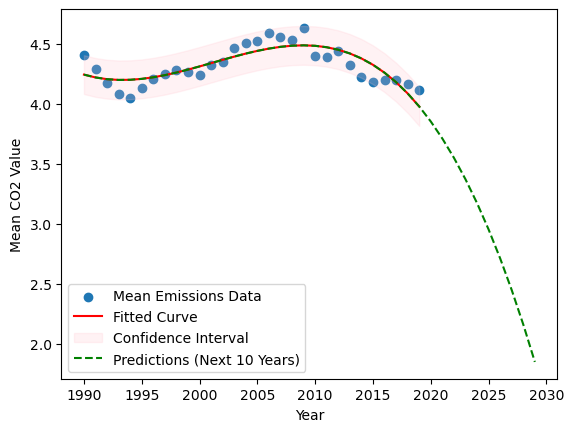

In [19]:
import numpy as np
import pandas as pd
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Drop rows with missing values in the 'CO2 Value' column
df1 = df1.dropna(subset=['CO2 Value'])

# Replace infinite values with NaN and then drop those rows
df1.replace([np.inf, -np.inf], np.nan, inplace=True)
df1 = df1.dropna(subset=['CO2 Value'])

# Group by 'Year' and calculate the mean emission value for each year
mean_data = df1.groupby('Year')['CO2 Value'].mean().reset_index()

# Function to fit a cubic polynomial model
def cubic_model(x, a, b, c, d):
    return a * x**3 + b * x**2 + c * x + d

# Fit the model to the mean data
x_data = mean_data['Year'].astype(int)  # Assuming 'Year' is a string, convert it to integer
y_data = mean_data['CO2 Value']

# Initial guess for the parameters
initial_guess = [1.0, 1.0, 1.0, 1.0]

# Use curve_fit to fit the cubic polynomial model
params, covariance = curve_fit(cubic_model, x_data, y_data, p0=initial_guess, maxfev=10000)

# Get the fitted curve
fitted_curve = cubic_model(x_data, *params)

# Calculate a simple error range based on the standard deviation of residuals
residuals = y_data - fitted_curve
error_range = 1.8 * np.std(residuals)  # 1.96 for a 95% confidence interval

lower_bound = fitted_curve - error_range
upper_bound = fitted_curve + error_range

# Extend x_data to predict emissions for the next 10 years
x_predict = np.concatenate([x_data, np.arange(x_data.max() + 1, x_data.max() + 11)])

# Use the fitted parameters to predict emissions for the next 10 years
y_predict = cubic_model(x_predict, *params)

# Plot the mean data, the fitted curve with confidence intervals, and predictions for the next 10 years
plt.scatter(x_data, y_data, label='Mean Emissions Data')
plt.plot(x_data, fitted_curve, label='Fitted Curve', color='red')
plt.fill_between(x_data, lower_bound, upper_bound, color='pink', alpha=0.2, label='Confidence Interval')
plt.plot(x_predict, y_predict, label='Predictions (Next 10 Years)', linestyle='--', color='green')
plt.xlabel('Year')
plt.ylabel('Mean CO2 Value')
plt.legend()
plt.show()

